In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/awesome/Downloads/Data Analysis/HPD/HPD.csv', parse_dates = ['Occurrence\nDate'])

In [3]:
df.columns = df.columns.str.replace('\n',' ')
list(df.columns)

['Incident',
 'Occurrence Date',
 'Occurrence Hour',
 'NIBRS Class',
 'NIBRSDescription',
 'Offense Count',
 'Beat',
 'Premise',
 'Block Range',
 'StreetName',
 'Street Type',
 'Suffix',
 'ZIP Code']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218428 entries, 0 to 218427
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Incident          218428 non-null  int64         
 1   Occurrence Date   218428 non-null  datetime64[ns]
 2   Occurrence Hour   218428 non-null  int64         
 3   NIBRS Class       218428 non-null  object        
 4   NIBRSDescription  218428 non-null  object        
 5   Offense Count     218428 non-null  int64         
 6   Beat              218307 non-null  object        
 7   Premise           218428 non-null  object        
 8   Block Range       218428 non-null  int64         
 9   StreetName        218428 non-null  object        
 10  Street Type       200763 non-null  object        
 11  Suffix            30456 non-null   object        
 12  ZIP Code          215724 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 21.

In [5]:
df.shape

(218428, 13)

In [7]:
df.rename(columns={'Occurrence Date':'Date','Occurrence Hour':'Hour', 'NIBRSDescription':'Description'}, inplace=True)

In [8]:
df.sample(5)

,Incident,Date,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
24182,19498119,2019-02-13,20,23F,Theft from motor vehicle,1,18F60,"Parking Lot, Garage",8150,SOUTHWEST,FWY,NaN,77036
111412,87903319,2019-07-09,22,23H,All other larceny,1,5F30,"Residence, Home (Includes Apartment)",6565,HOLLISTER,ST,NaN,77040
108916,87123319,2019-07-05,23,240,Motor vehicle theft,1,4F30,"Residence, Home (Includes Apartment)",15335,PARK ROW,DR,NaN,77084
40860,33095519,2019-03-16,1,23D,Theft from building,1,6B30,"Bar, Nightclub",7355,ALABONSON,RD,NaN,77088
134784,105610019,2019-08-16,1,240,Motor vehicle theft,4,3B10,Industrial Site,10800,NORTHWEST,FWY,NaN,77092


# How many incidents are happening each day?

In [67]:
df['Date'].value_counts().describe()

count    365.000000
mean     598.432877
std       50.814076
min      449.000000
25%      566.000000
50%      600.000000
75%      634.000000
max      765.000000
Name: Date, dtype: float64

In [71]:
df['Date'].value_counts()[:10]

2019-05-01    765
2019-07-01    764
2019-06-01    723
2019-08-01    708
2019-11-01    705
2019-12-06    704
2019-11-22    704
2019-04-29    695
2019-05-15    691
2019-06-08    690
Name: Date, dtype: int64

In [ ]:
##On average there are about 598 reported incidents with decent spread of data due to a small standard deviation.

In [69]:
df_count = df.groupby(['Date'])['Date'].agg(['count']).sort_values(by='Date').reset_index()
q1 = df_count['count'].quantile(0.25)
q3 = df_count['count'].quantile(0.75)
iqr = q3 -q1
l_limit = q1 -1.5*iqr
u_limit = q3 + 1.5*iqr
df_count[(df_count['count'] < l_limit) | (df_count['count'] > u_limit)]

,Date,count
63,2019-03-05,456
110,2019-04-21,449
120,2019-05-01,765
181,2019-07-01,764
331,2019-11-28,456


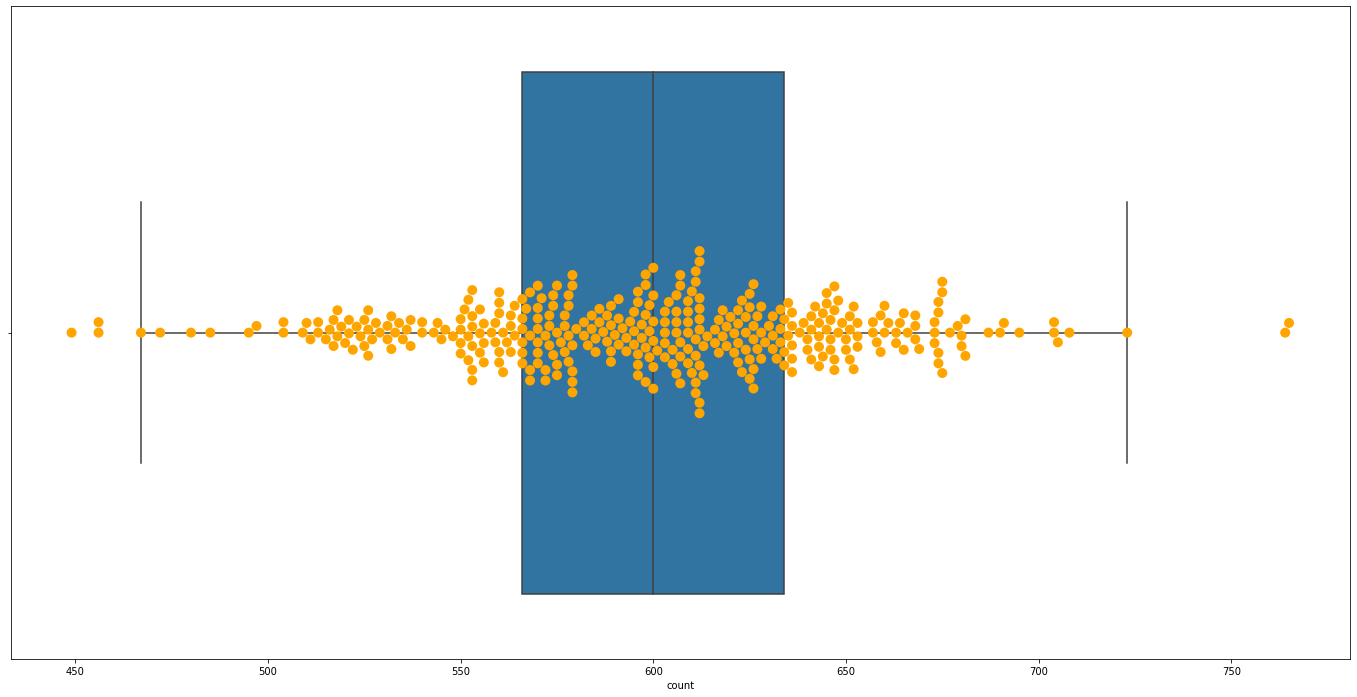

In [70]:
plt.figure(figsize=(24,12))
sns.boxplot(x='count', data=df_count, showfliers=False)
sns.swarmplot(x='count', data=df_count, color="orange", s=10)
plt.show()

## What are the top 10 most reported incidents?

In [48]:
def count_per(data):
    Total = df['Description'].value_counts()[:10]
    Percentage = df['Description'].value_counts(normalize=True)[:10]
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
count_per(df)

,Total,Percent
Theft from motor vehicle,33062,0.151363
Simple assault,27138,0.124242
"Destruction, damage, vandalism",21617,0.098966
All other larceny,18440,0.084421
"Burglary, Breaking and Entering",16879,0.077275
Intimidation,14135,0.064712
Motor vehicle theft,13075,0.059860
Aggravated Assault,12652,0.057923
Shoplifting,10788,0.049389
Robbery,9195,0.042096


In [40]:
df[df['Description']=='Theft from motor vehicle'].groupby(['Date'])['Date'].agg(['count']).mean()

count    90.580822
dtype: float64

In [56]:
df[df['Description']=='Simple assault'].groupby(['Date'])['Date'].agg(['count']).mean()

count    74.350685
dtype: float64

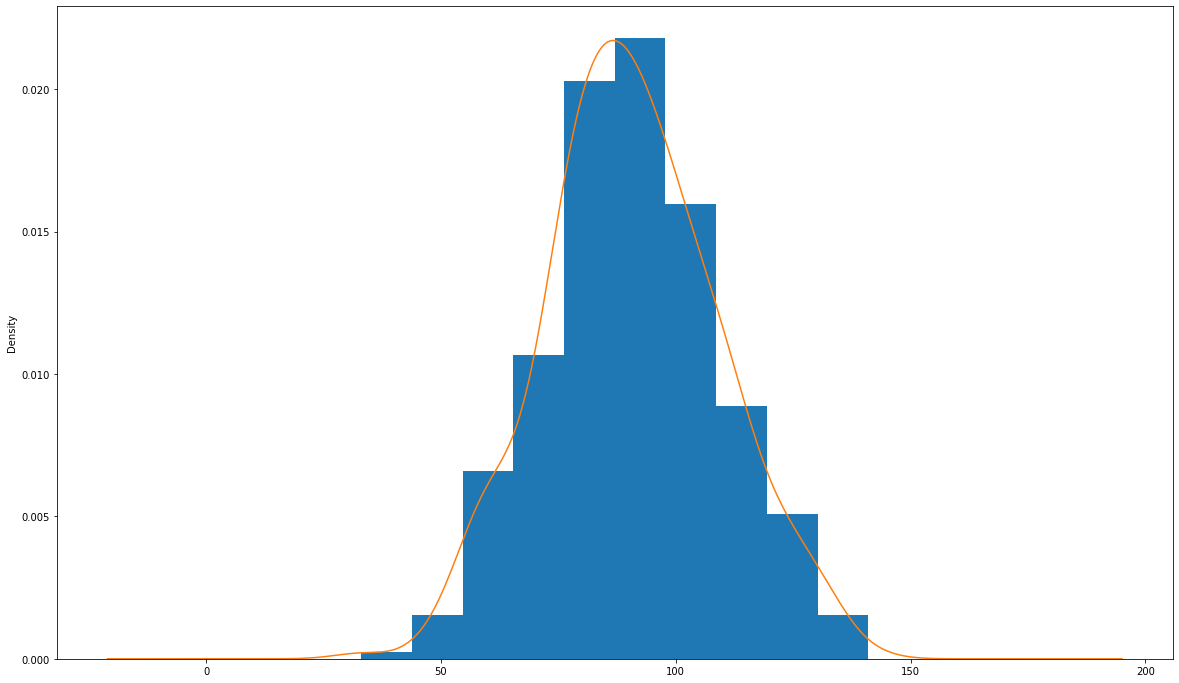

In [45]:
fig, ax = plt.subplots(figsize=(20,12))
ax = df[df['Description']=='Theft from motor vehicle'].groupby(['Date'])['Date'].count().plot(kind='hist', density=True)
ax1 = df[df['Description']=='Theft from motor vehicle'].groupby(['Date'])['Date'].count().plot(kind='kde')
plt.show()

In [ ]:
##Theft from motor vehicle is the most reported incident and an average of over 90 reports a day.
## Thats about 22% more than simple assault.

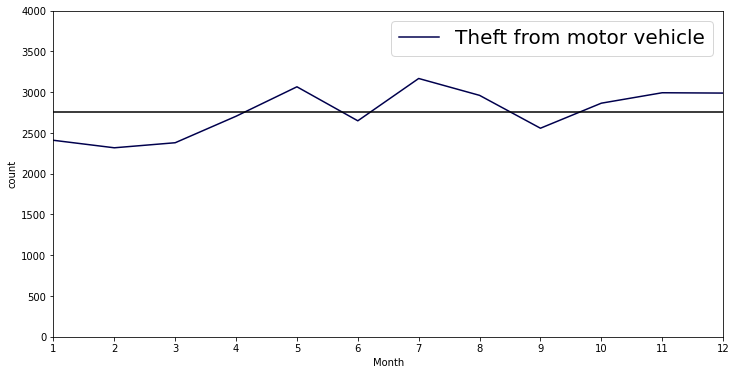

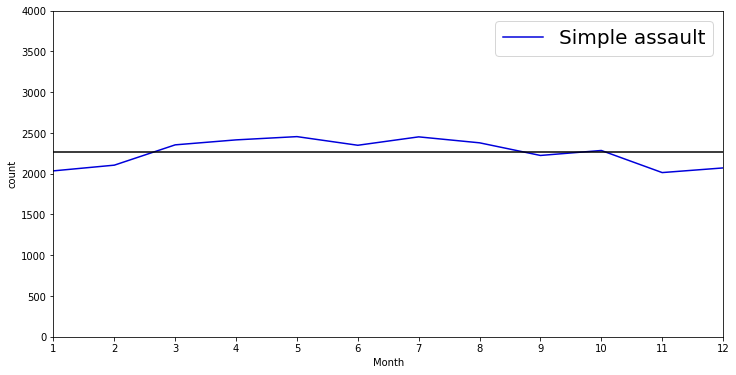

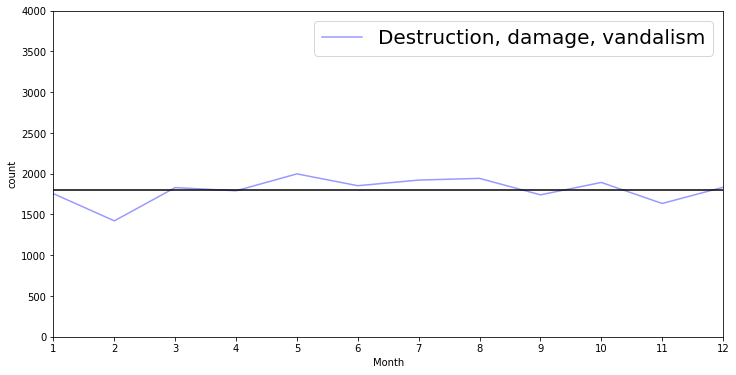

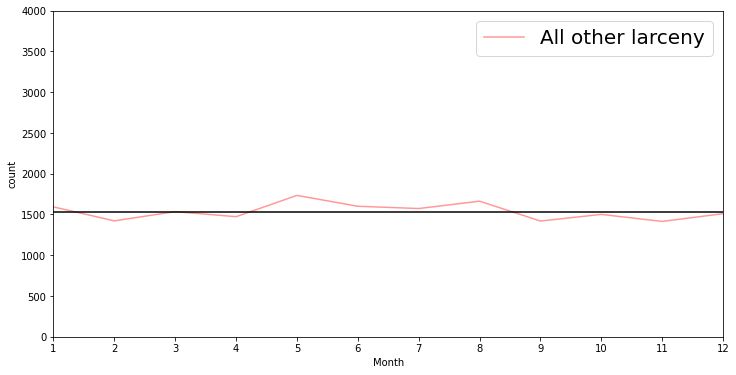

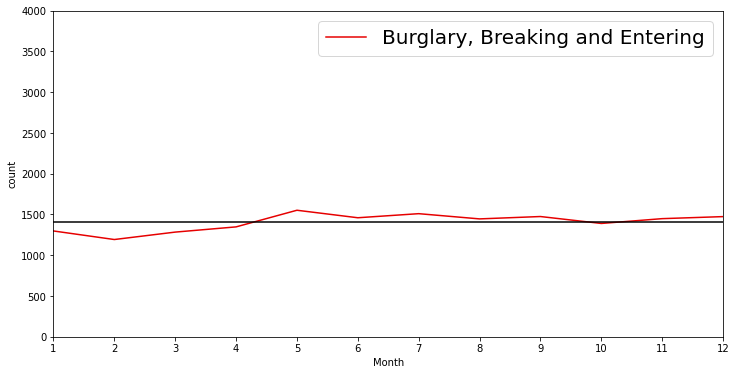

In [155]:
d = [x for x in df['Description'].value_counts()[:5].index]
for y in range(0,5):
    cmap = plt.get_cmap("seismic", len(d)+1)
    data = df[df['Description']==d[y]].groupby(['Month'])['Month'].agg(['count'])
    fig, ax = plt.subplots(figsize=(12,6), subplot_kw={'ylim': (0,4000)})
    ax = sns.lineplot(data=data, x="Month", y="count", label = d[y], color = cmap(y))
    mean = data['count'].mean()
    ax.axhline(mean, color='black')
    plt.xticks(range(1,13))
    plt.margins(0)
    plt.legend(loc='best', prop={'size':20})
    plt.show()

# What type of locations are these incidents happening mostly at?

In [57]:
def count_per(data):
    Total = df['Premise'].value_counts()[:10]
    Percentage = df['Premise'].value_counts(normalize=True)[:10]
    
    return pd.concat([Total,Percentage], axis=1, keys = ['Total', 'Percent'])
count_per(df)

,Total,Percent
"Residence, Home (Includes Apartment)",81140,0.371473
"Parking Lot, Garage",42139,0.192919
"Highway, Road, Street, Alley",27743,0.127012
"Other, Unknown",9988,0.045727
"Department, Discount Store",7118,0.032587
Restaurant,6146,0.028137
"Commercial, Office Building",5678,0.025995
Convenience Store,5372,0.024594
"Service, Gas Station",4816,0.022048
"Hotel, Motel, ETC",4029,0.018445


In [ ]:
##There are 2 times as more incidents happening in Residence, Home (Includes Apartment) than Parking Lot, Garage.

In [65]:
df[df['Description']=='Theft from motor vehicle']['Premise'].value_counts()[:10]

Parking Lot, Garage                     17675
Residence, Home (Includes Apartment)     5573
Highway, Road, Street, Alley             4537
Restaurant                               1052
Hotel, Motel, ETC                         596
Other, Unknown                            584
Park/Playground                           574
Service, Gas Station                      533
Commercial, Office Building               314
Bar, Nightclub                            258
Name: Premise, dtype: int64

In [ ]:
## There are over 3 times as more Theft from motor vehicle happening in Parking Lot, Garage than residental areas.

In [63]:
df[df['Description']=='Simple assault']['Premise'].value_counts()[:10]

Residence, Home (Includes Apartment)    16760
Highway, Road, Street, Alley             2918
Parking Lot, Garage                      2047
Bar, Nightclub                            667
Hotel, Motel, ETC                         663
Other, Unknown                            551
Restaurant                                537
Convenience Store                         469
Service, Gas Station                      424
Drug Store, Doctors Office, Hospital      332
Name: Premise, dtype: int64

In [ ]:
## 8 times more likely to get assaulted in a residnetal area than a parking lot or garage.

# Seasonal Trends

In [80]:
df['Month'] = df['Date'].dt.month
column_move1 = df['Month']
df.drop(labels=['Month'], axis=1, inplace=True)
df.insert(2,'Month', column_move1)

df['Day'] = df['Date'].dt.day
column_move2 = df['Day']
df.drop(labels=['Day'], axis=1, inplace=True)
df.insert(3,'Day', column_move2)

df['Day_of_Week'] = df['Date'].dt.day_name()
column_move3 = df['Day_of_Week']
df.drop(labels=['Day_of_Week'], axis=1, inplace=True)
df.insert(4,'Day_of_Week', column_move3)

df['week_of_year'] = df['Date'].apply(lambda x: x.weekofyear)
column_move4 = df['week_of_year']
df.drop(labels=['week_of_year'], axis=1, inplace=True)
df.insert(5,'week_of_year', column_move4)

df['day_of_year'] = df['Date'].apply(lambda x: x.dayofyear)
column_move5 = df['day_of_year']
df.drop(labels=['day_of_year'], axis=1, inplace=True)
df.insert(6,'day_of_year', column_move5)

In [81]:
df.sample(5)

,Incident,Date,Month,Day,Day_of_Week,week_of_year,day_of_year,Hour,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
88830,69986519,2019-06-03,6,3,Monday,23,154,3,13A,Aggravated Assault,1,8C60,"Residence, Home (Includes Apartment)",10030,WOODWICK,ST,NaN,77016
19426,15697619,2019-02-05,2,5,Tuesday,6,36,15,280,Stolen property offenses,1,6B20,"Residence, Home (Includes Apartment)",125,RED RIPPLE,RD,NaN,77076
189091,149547819,2019-11-13,11,13,Wednesday,46,317,13,13C,Intimidation,1,6B10,"Residence, Home (Includes Apartment)",315,ROSAMOND,NaN,NaN,77076
194343,10043720,2019-11-22,11,22,Friday,47,326,8,23H,All other larceny,1,9C40,Speciality Store,11700,WALLISVILLE,RD,NaN,77013
217016,171518419,2019-12-29,12,29,Sunday,52,363,16,240,Motor vehicle theft,1,22B20,"Parking Lot, Garage",239,GREENS,RD,NaN,77060


In [88]:
def seasons(df):
  if (df['Month'] == 12) | (df['Month'] >=1) & (df['Month'] <=2):
    return 'Winter'
  elif (df['Month'] >=3) & (df['Month'] <=5):
    return 'Spring'
  elif (df['Month'] >=6) & (df['Month'] <=8):
    return 'Summer'        
  else:
    return "Fall"
df['season'] = df.apply(seasons, axis=1)

column_move6 = df['season']
df.drop(labels=['season'], axis=1, inplace=True)
df.insert(8,'season', column_move6)

In [89]:
df.sample(1)

,Incident,Date,Month,Day,Day_of_Week,week_of_year,day_of_year,Hour,season,NIBRS Class,Description,Offense Count,Beat,Premise,Block Range,StreetName,Street Type,Suffix,ZIP Code
144937,113790219,2019-09-01,9,1,Sunday,35,244,15,Fall,23C,Shoplifting,1,18F40,"Other, Unknown",7539,WESTHEIMER,RD,NaN,77063


In [90]:
df['season'].value_counts()

Summer    57112
Fall      55193
Spring    54994
Winter    51129
Name: season, dtype: int64

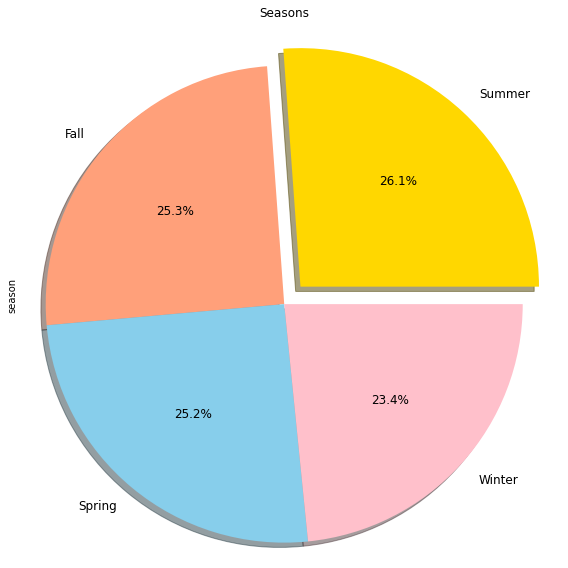

In [92]:
seasons_count = df['season'].value_counts()
colors = ['gold','lightsalmon','skyblue','pink']
explode = (0.1, 0, 0, 0)
seasons_count.plot(kind = 'pie', title='Seasons', explode= explode, subplots=True,
                       autopct='%1.1f%%',shadow=True,figsize=(8,8), fontsize= 12, colors= colors)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
## Although not a huge difference, summer has the highest report incidents
## The difference between the summer and winter is only 3%

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


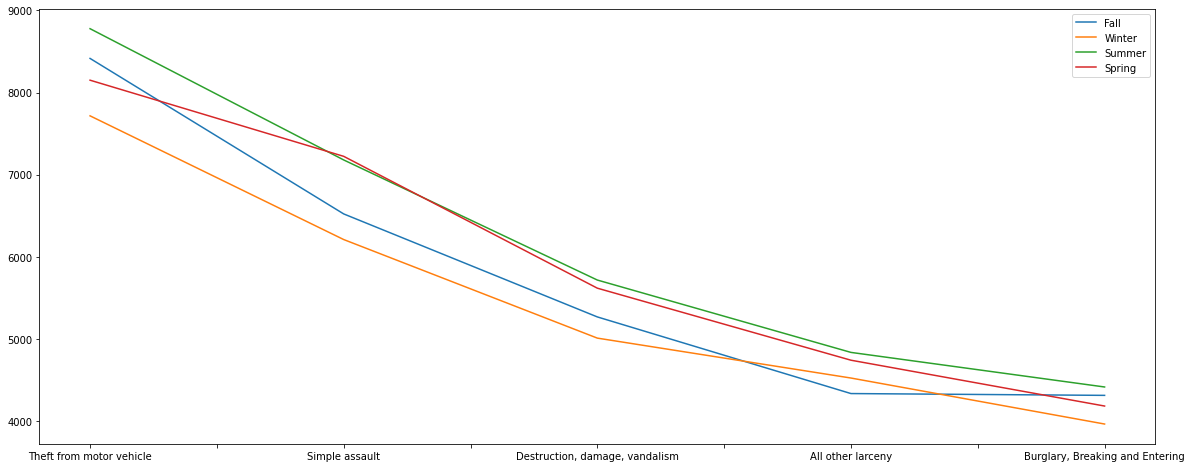

In [131]:
seasons = ['Fall', 'Winter', 'Summer', 'Spring'] 
for s in seasons:
    s_plot = df[df['season']==s]['Description'].value_counts()[:5].plot(figsize=(20,8))
    plt.legend(seasons)
    print(s_plot)

In [133]:
pd.crosstab(index = df['Description'], 
            columns=df['season'],
            dropna=True)

season,Fall,Spring,Summer,Winter
Description,,,,
Aggravated Assault,3415,3133,3244,2860
All other larceny,4336,4742,4837,4525
Animal Cruelty,83,79,90,77
Arson,121,130,124,112
Assisting or promoting prostitution,18,15,18,17
Betting/wagering,3,4,2,2
Bribery,3,2,2,2
"Burglary, Breaking and Entering",4314,4184,4416,3965
"Counterfeiting, forgery",781,652,717,683
